<a href="https://colab.research.google.com/github/pliniosa/treinamento_Webinar/blob/main/Treinamento_dataset_nasa_notebook_webinar_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Webinar com dados da NASA

Python para a Análise de Dados e Inteligência Artificial na predição da vida útil remanescente de motores da NASA

## Introdução Jupyter Notebook

Para executar uma célula:
* Shift + Enter: roda a célula e vai para a próxima
* Ctrl + Enter: roda a célula e se mantém na mesma
* Alt + Enter: roda a célula e cria nova abaixo


In [ ]:
# Isso é um comentário em uma célula tipo "code"

# Tente executar o comando abaixo


## Aula 1

Conteúdo:
* carregamento dos dados
* visualização inicial

Carregar bibliotecas que utilizaremos no webinar


In [ ]:
# Pandas - carrega os dados, transforma em tabelas e permite operações na tabela
import pandas as pd

# Numpy - computação científica
import numpy as np

# Matplotlib e Seaborn - visualização
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# scikit-learn - aprendizado de máquina
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# extensão que renderiza dataframes do pandas em tabelas interativas
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


### Carregamento dos dados

Utilizaremos a primeira base de dados (FD0001), pois é a mais simples.

In [ ]:
# definição do caminho dos arquivos para ler os dados
caminho_diretorio = 'https://raw.githubusercontent.com/andressaapio/nasa_dataset/main/CMAPSSData/' 

Note que não temos o nome das colunas nos dados originais, então precisamos criá-los

In [ ]:
# definição dos nomes das colunas para os índices
indices_lista = ['motor', 'ciclo_tempo']
configuracao_lista = ['config_1', 'config_2', 'config_3']

# para não precisar escrever o nome dos 21 sensores, vamos utilizar o loop for
sensores_lista = []
for n in range(1, 22):
    sensores_lista.append(f'sensor_{n}')
  
# modo em uma linha 
# sensores_lista = [f'sensor_{i}' for i in range(1, 22)] 

print(sensores_lista)

['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']


In [ ]:
# No Python, juntamos as listas somando-as
colunas = indices_lista + configuracao_lista + sensores_lista
print(colunas)

['motor', 'ciclo_tempo', 'config_1', 'config_2', 'config_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']


In [ ]:
# leitura dos dados
treino = pd.read_csv(caminho_diretorio+'train_FD001.txt', sep='\s+', header=None, names=colunas)
teste = pd.read_csv(caminho_diretorio+'test_FD001.txt', sep='\s+', header=None, names=colunas)
y_teste = pd.read_csv(caminho_diretorio+'RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])

### Visualização inicial

In [ ]:
# visualização das 5 primeiras linhas

#display(treino) ou
treino.head(10)

,motor,ciclo_tempo,config_1,config_2,config_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [ ]:
# visualização das 5 últimas linhas
treino.tail(5)

,motor,ciclo_tempo,config_1,config_2,config_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


In [ ]:
# média para cada coluna
treino.mean()

motor            51.506568
ciclo_tempo     108.807862
config_1         -0.000009
config_2          0.000002
config_3        100.000000
sensor_1        518.670000
sensor_2        642.680934
sensor_3       1590.523119
sensor_4       1408.933782
sensor_5         14.620000
sensor_6         21.609803
sensor_7        553.367711
sensor_8       2388.096652
sensor_9       9065.242941
sensor_10         1.300000
sensor_11        47.541168
sensor_12       521.413470
sensor_13      2388.096152
sensor_14      8143.752722
sensor_15         8.442146
sensor_16         0.030000
sensor_17       393.210654
sensor_18      2388.000000
sensor_19       100.000000
sensor_20        38.816271
sensor_21        23.289705
dtype: float64

In [ ]:
# seleção de um dos sensores
#treino.sensor_1  ou
treino['sensor_1']

0        518.67
1        518.67
2        518.67
3        518.67
4        518.67
          ...  
20626    518.67
20627    518.67
20628    518.67
20629    518.67
20630    518.67
Name: sensor_1, Length: 20631, dtype: float64

In [ ]:
# filtro para uma das aeronaves
treino[treino['motor'] == 1]

,motor,ciclo_tempo,config_1,config_2,config_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


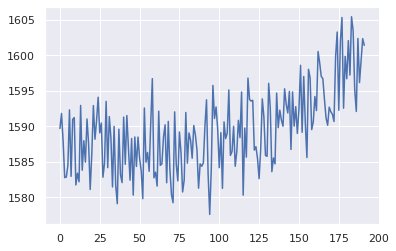

In [ ]:
# visualização básica de um sensor em uma aeronave
treino[treino['motor'] == 1]['sensor_3'].plot()

## Aula 2
* exploração dos dados
* limpeza dos dados

### Exploração dos dados

In [ ]:
# resumo das propriedades estatísticas dos dados
treino.describe()

,motor,ciclo_tempo,config_1,config_2,config_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


O desvio padrão para a configuração do motor é muito baixo (valores praticamente iguais). Isso é verdade, já que é uma condição da base de dados que estamos utilizando.

In [ ]:
# inspeção apenas das variáveis estatísticas dos sensores
treino[sensores_lista].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sensor_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
sensor_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
sensor_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
sensor_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
sensor_10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000


Para os sensores 1, 5, 6, 10, 16, 18 e 19 o desvio padrão é muito baixo, indicando que os valores mudam pouco. Com isso, não serão úteis para a Inteligência Artificial.

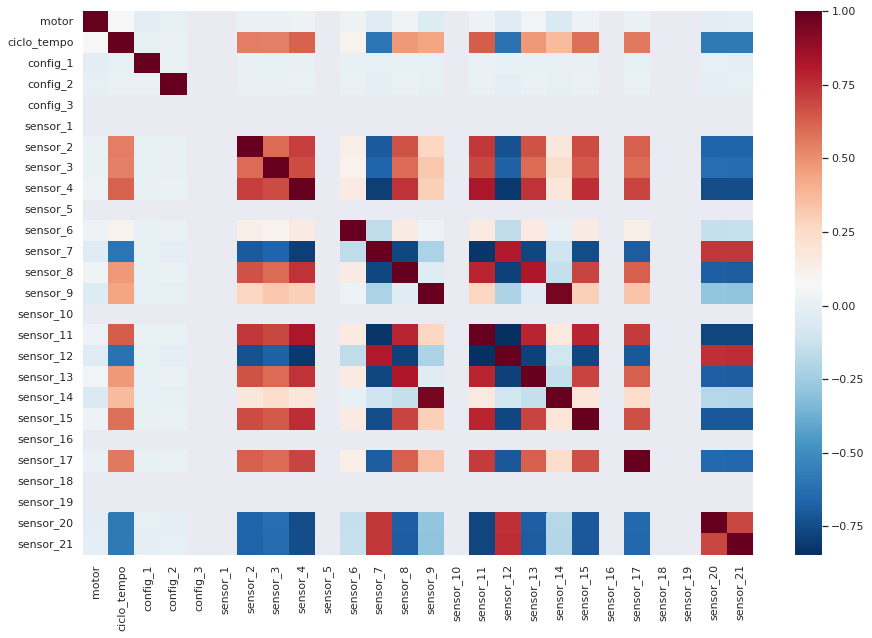

In [ ]:
# criação do mapa de calor utilizando a matriz de correlação entre os dados

plt.figure(figsize=(15,10))
corrmat = treino.corr()
sns.heatmap(corrmat, cmap="RdBu_r")


Os sensores 9 e 14 possuem uma forte correlação. Isso indica que eles possuem praticamente a mesma informação e um deles pode ser removido. Vamos remover os dados do sensor 9.

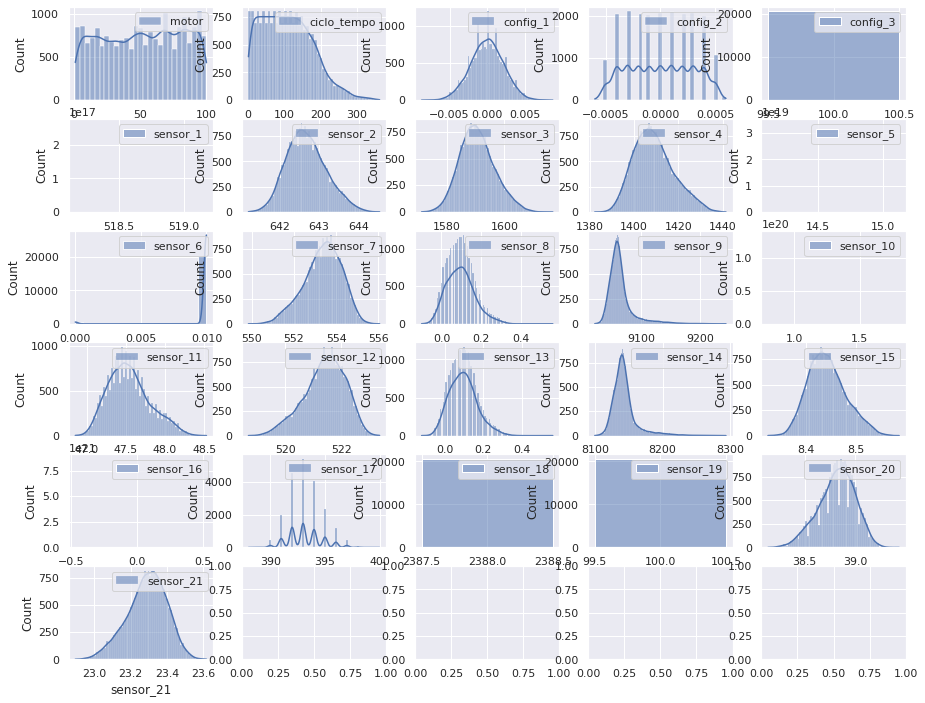

In [ ]:
# distribuição de todas as variáveis do dataframe
cols = treino.columns
n_cols = min(len(cols), 5)
n_rows = int(np.ceil(len(cols) / n_cols))

sns.set()
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,12))
axes = axes.flatten()
for col, ax in zip(cols, axes):
    ax=sns.histplot(treino[col], kde=True, ax=ax, label=col)
    ax.legend(loc=1)

Finalizamos a etapa com a conclusão que removeremos:
* colunas de configuração
* dados dos sensores 1, 5, 6, 9, 10, 16, 18 e 19

### Remoção dos outliers

Como os dados são simulados, não temos a presença de outliers. Mesmo assim, vamos aplicar uma técnica de remoção de outlier para demonstração.


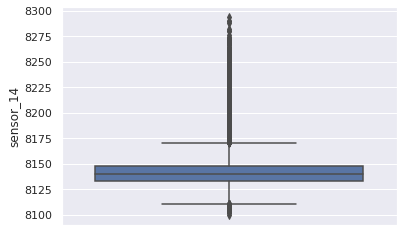

In [ ]:
# podemos avaliar os outliers através do box plot
sns.boxplot(y='sensor_14', data=treino);

In [ ]:
# remoção dos outliers através do método de interquartis
sensor = ['sensor_14']
Q1 = treino[sensor].quantile(0.25)
Q3 = treino[sensor].quantile(0.75)
IQR = Q3 - Q1

treino_sem_outliers = treino[~((treino[sensor] < (Q1 - 1.5 * IQR)) | (treino[sensor] > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


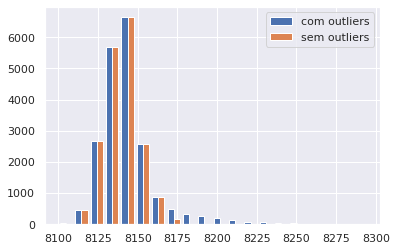

In [ ]:
# comparação entre as distribuições com e sem outliers
plt.hist([treino[sensor], treino_sem_outliers[sensor]], bins=20, label=['com outliers', 'sem outliers'])
plt.legend()
plt.show();

### Cálculo do RUL para os dados de treinamento
Para o treinamento da Inteligência Artificial, precisamos determinar a variável objetivo, que nesse caso é o RUL. Ainda não temos o valor do RUL nos dados de treinamento, mas podemos calcular a partir do dados que possuimos da seguinte forma para cada motor:

RUL = máximo(ciclo_tempo) - ciclo tempo



In [ ]:
treino[['motor', 'ciclo_tempo']].tail(200) 

,motor,ciclo_tempo
20431,100,1
20432,100,2
20433,100,3
20434,100,4
20435,100,5
...,...,...
20626,100,196
20627,100,197
20628,100,198
20629,100,199


In [ ]:
# cálculo do RUL por motor. substraimos o ciclo máximo pelo ciclo atual
treino['RUL'] = treino.groupby('motor')['ciclo_tempo'].transform(max) - treino['ciclo_tempo']

In [ ]:
# número total de ciclos para cada motor
treino.groupby('motor')['ciclo_tempo'].transform(max)

0        192
1        192
2        192
3        192
4        192
        ... 
20626    200
20627    200
20628    200
20629    200
20630    200
Name: ciclo_tempo, Length: 20631, dtype: int64

In [ ]:
# cálculo do RUL por motor. substraimos o ciclo máximo pelo ciclo atual
treino['RUL'] = treino.groupby('motor')['ciclo_tempo'].transform(max) - treino['ciclo_tempo']

In [ ]:
treino.tail(200)

,motor,ciclo_tempo,config_1,config_2,config_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
20431,100,1,-0.0033,0.0003,100.0,518.67,642.25,1596.57,1404.52,14.62,...,2388.14,8146.76,8.4177,0.03,393,2388,100.0,38.72,23.3899,199
20432,100,2,0.0010,-0.0004,100.0,518.67,642.37,1589.43,1397.40,14.62,...,2388.10,8143.56,8.4186,0.03,393,2388,100.0,39.18,23.2460,198
20433,100,3,0.0024,-0.0004,100.0,518.67,643.13,1588.55,1397.71,14.62,...,2388.09,8146.62,8.4391,0.03,393,2388,100.0,38.95,23.2034,197
20434,100,4,0.0014,0.0001,100.0,518.67,642.33,1588.13,1397.93,14.62,...,2387.97,8146.60,8.4274,0.03,393,2388,100.0,38.77,23.2495,196
20435,100,5,-0.0018,0.0003,100.0,518.67,641.90,1590.02,1400.60,14.62,...,2388.09,8141.82,8.3650,0.03,392,2388,100.0,39.06,23.2351,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


## Aula 3

* separação dos dados em treino e teste
* aplicação de aprendizado de máquina

### Separação dos dados em treino e teste

In [ ]:
# remoção dos sensores do dataframe, considerando as análises realizadas
lista_sensores_remover = [1, 5, 6, 9, 10, 16, 18, 19]
remover_sensores = ['sensor_' + str(item) for item in lista_sensores_remover]

# remover as colunas de índice e configuração
remover_colunas = indices_lista + configuracao_lista + remover_sensores

In [ ]:
# # removendo os dados que não agregaram na análise
X_treino = treino.drop(remover_colunas, axis=1)

# selecionar a coluna RUL para a resposta y
Y_treino = X_treino.pop('RUL')

In [ ]:
# agrupamos os dados de teste para o último valor do motor
X_teste = teste.groupby('motor').last().reset_index().drop(remover_colunas, axis=1)

In [ ]:
X_teste

,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,642.58,1581.22,1398.91,554.42,2388.08,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
1,642.55,1586.59,1410.83,553.52,2388.10,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618
2,642.88,1589.75,1418.89,552.59,2388.16,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740
3,642.78,1594.53,1406.88,552.64,2388.13,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581
4,642.27,1589.94,1419.36,553.29,2388.10,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,642.30,1590.88,1397.94,553.99,2388.03,47.14,522.30,2388.01,8148.24,8.4110,391,38.96,23.4606
96,642.59,1582.96,1410.92,554.05,2388.06,47.38,521.58,2388.06,8155.48,8.4500,395,38.61,23.2953
97,642.68,1599.51,1415.47,553.44,2388.13,47.66,521.53,2388.09,8146.39,8.4235,394,38.76,23.3608
98,642.00,1585.03,1397.98,554.75,2388.01,47.26,521.82,2388.02,8150.38,8.4003,391,38.95,23.3595


### Aplicação de Machine Learning

In [ ]:
# criação de função de avaliação dos modelos
def avaliacao(y_real, y_pred, legenda):
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    print(f'conjunto {legenda} MAE:{mae}, R2:{r2}')

In [ ]:
# ajuste do modelo de árvores aleatórias com os dados de treino
rf = RandomForestRegressor(random_state=10)
rf.fit(X_treino, Y_treino)

RandomForestRegressor(random_state=10)

In [ ]:
# predição e avaliação com os dados de treino para o modelo gerado
y_pred_treino = rf.predict(X_treino)
avaliacao(Y_treino, y_pred_treino, 'treino')

conjunto treino MAE:11.034526683146721, R2:0.9480056910461747


In [ ]:
# predição e avaliação com os dados de teste para o modelo gerado
y_pred_teste = rf.predict(X_teste)
avaliacao(y_teste, y_pred_teste, 'teste')

conjunto teste MAE:24.817499999999995, R2:0.33800190182281264


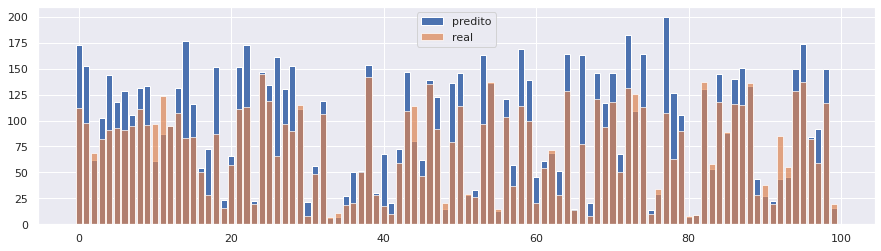

In [ ]:
# comparação gráfica do tempo de vida útil remanescente (RUL) real e predito pelo modelo
x = np.arange(0,100)
plt.figure(figsize=(15,4))
plt.bar(x, y_pred_teste, label='predito')
plt.bar(x, y_teste['RUL'], label='real', alpha=0.7)
plt.legend();

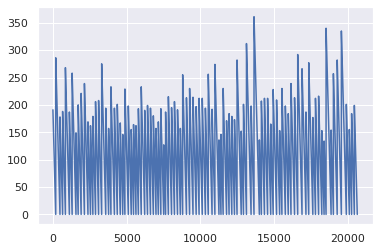

In [ ]:
y_treino.plot()

In [ ]:
# relação entre valores preditos e reais


#### Limitando valores do RUl

Como visto na figura, o algoritmo superestima as predições do RUL. Isso acontece porque temos vários exemplos com RUL acima de 150 nos dados de treinamento, mas não temos esse comportamento nos dados de teste. 

Então, vamos limitar o RUL para os dados de treinamento em 150.

In [ ]:
ind_menor_150 = y_treino < 150

y_treino_150 = y_treino[ind_menor_150]
X_treino_150 = X_treino[ind_menor_150]

In [ ]:
# ajuste do modelo de árvores aleatórias com os dados de treino
rf = RandomForestRegressor(random_state=10)
rf.fit(X_treino_150, y_treino_150)

RandomForestRegressor(random_state=10)

In [ ]:
# predição e avaliação com os dados de treino para o modelo gerado
y_pred_treino = rf.predict(X_treino_150)
avaliacao(y_treino_150, y_pred_treino, 'treino')

conjunto treino MAE:6.090402518250619, R2:0.9643802348405971


In [ ]:
# predição e avaliação com os dados de teste para o modelo gerado
y_pred_test_150 = rf.predict(X_teste)
avaliacao(y_teste, y_pred_test_150, 'teste')

conjunto teste MAE:13.185399999999998, R2:0.8114471735445455


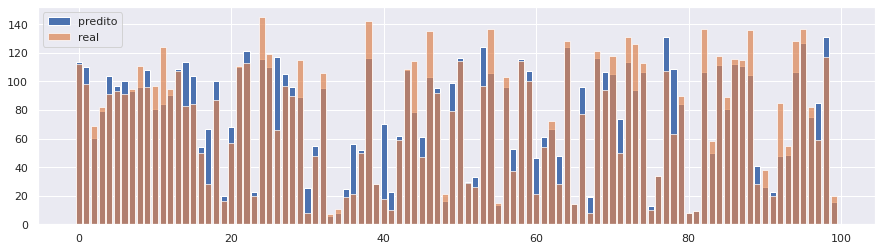

In [ ]:
# comparação gráfica do tempo de vida útil remanescente (RUL) real e predito pelo modelo
x = np.arange(0,100)
plt.figure(figsize=(15,4))
plt.bar(x, y_pred_test_150, label='predito')
plt.bar(x, y_teste['RUL'], label='real', alpha=0.7)
plt.legend();